In [1]:
import pandas as pd
import nltk
nltk.download('stopwords') 
nltk.download('wordnet')
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import string
from matplotlib import pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jillian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jillian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
text=pd.read_pickle('primary_df.pkl')
text

,raw_text,sect
source,,
Dead_Suns_1,SUNRISE MAIDEN\n\n\nTIER 3\n\nSanjaval Vagabon...,SUNRISE MAIDEN
Dead_Suns_1,SUNRISE MAIDEN\n\n\nTIER 3\n\nSanjaval Vagabon...,TIER 3\n\nSanjaval Vagabond\nMedium explorer\n...
Dead_Suns_1,SUNRISE MAIDEN\n\n\nTIER 3\n\nSanjaval Vagabon...,SUNRISE MAIDEN MAP KEY\n1. Bridge\na. Pilot’s ...
Dead_Suns_1,SUNRISE MAIDEN\n\n\nTIER 3\n\nSanjaval Vagabon...,"\nFORTUNE IN THE STARS\n\nTake your station, c..."
Dead_Suns_1,SUNRISE MAIDEN\n\n\nTIER 3\n\nSanjaval Vagabon...,The Starfinder Adventure Path is designed to p...
...,...,...
Dead_Suns_2,THAUMTECH\nCAIRNCARVER\n\nTIER 2\n\nSmall ligh...,8
Dead_Suns_2,THAUMTECH\nCAIRNCARVER\n\nTIER 2\n\nSmall ligh...,"4,800"
Dead_Suns_2,THAUMTECH\nCAIRNCARVER\n\nTIER 2\n\nSmall ligh...,\nBulldoze (Ex) When a yaruk uses its trample ...


In [3]:
def clean_text(text):
    '''removing words under 3 letters long'''
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('[‘’“”…]', ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub(r'\b\w{1,3}\b', ' ', text)
    return text

clean = lambda x: clean_text(x)
text=pd.DataFrame(text.sect.apply(clean))
text

,sect
source,
Dead_Suns_1,SUNRISE MAIDEN
Dead_Suns_1,TIER Sanjaval Vagabond Medium explorer Spee...
Dead_Suns_1,SUNRISE MAIDEN Bridge Pilot statio...
Dead_Suns_1,FORTUNE STARS Take your station check y...
Dead_Suns_1,Starfinder Adventure Path designed prese...
...,...
Dead_Suns_2,
Dead_Suns_2,
Dead_Suns_2,Bulldoze When yaruk uses trample abil...


In [4]:
#!python -m spacy download en_core_web_md

In [5]:
import spacy
from collections import Counter
import en_core_web_md
nlp = nlp = en_core_web_md.load()
nlp.max_length = 7225590

In [6]:
tokens=nlp(''.join(str(text.sect.tolist())))

In [7]:
items = [x.text for x in tokens.ents]
Counter(items).most_common(20)

[('first', 828),
 ('three', 577),
 ('half', 404),
 ('Corpse Fleet', 387),
 ('Azlanti', 379),
 ('four', 353),
 ('hours', 320),
 ('Absalom Station', 299),
 ('second', 264),
 ('Morale', 243),
 ('comm', 229),
 ('minutes', 212),
 ('Shadow Plane', 199),
 ('dycepskian', 195),
 ('Init', 187),
 ('Material Plane', 179),
 ('Gragant', 164),
 ('Story Award', 155),
 ('Pact Worlds', 154),
 ('Reflex', 154)]

In [8]:
person_list = []
for ent in tokens.ents:
    if ent.label_ == 'PERSON':
        person_list.append(ent.text)
        
person_counts = Counter(person_list).most_common(30)
df_person = pd.DataFrame(person_counts, columns =['text', 'count'])

In [9]:
df_person

,text,count
0,Gragant,154
1,Khaim,147
2,kish,102
3,Madelon,90
4,Kiiv,84
5,Starstone,79
6,Golarion,75
7,Liavara,68
8,Cedona,68
9,Nakondis,64


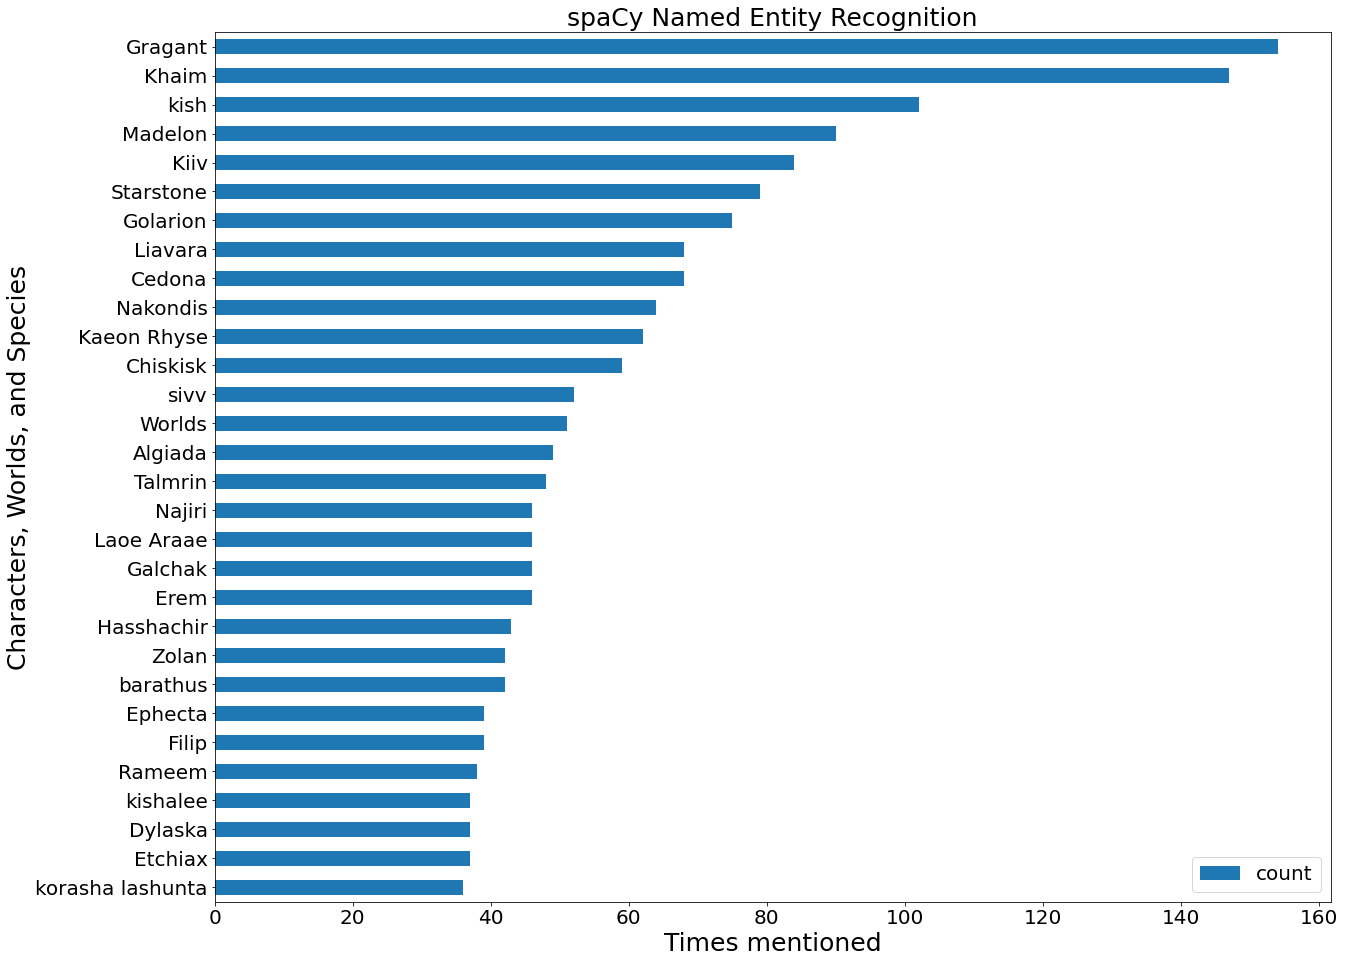

In [16]:
df_person.plot.barh(x='text', y='count',figsize=(20,16)).invert_yaxis()
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Characters, Worlds, and Species', fontsize=25)
plt.xlabel('Times mentioned', fontsize=25)
plt.title("spaCy Named Entity Recognition",fontsize=25)
plt.legend(fontsize=20);

In [11]:
norp_list = []
for ent in tokens.ents:
    if ent.label_ == 'NORP':
        norp_list.append(ent.text)
        
norp_counts = Counter(norp_list).most_common(30)
df_norp = pd.DataFrame(norp_counts, columns =['text', 'count'])

In [12]:
df_norp

,text,count
0,dycepskian,195
1,Eoxian,104
2,Istamak,102
3,Tuvah,84
4,Suskillon,64
5,Reflex,50
6,Hibb,41
7,Hylax,38
8,Idari,32
9,Cinneka,30


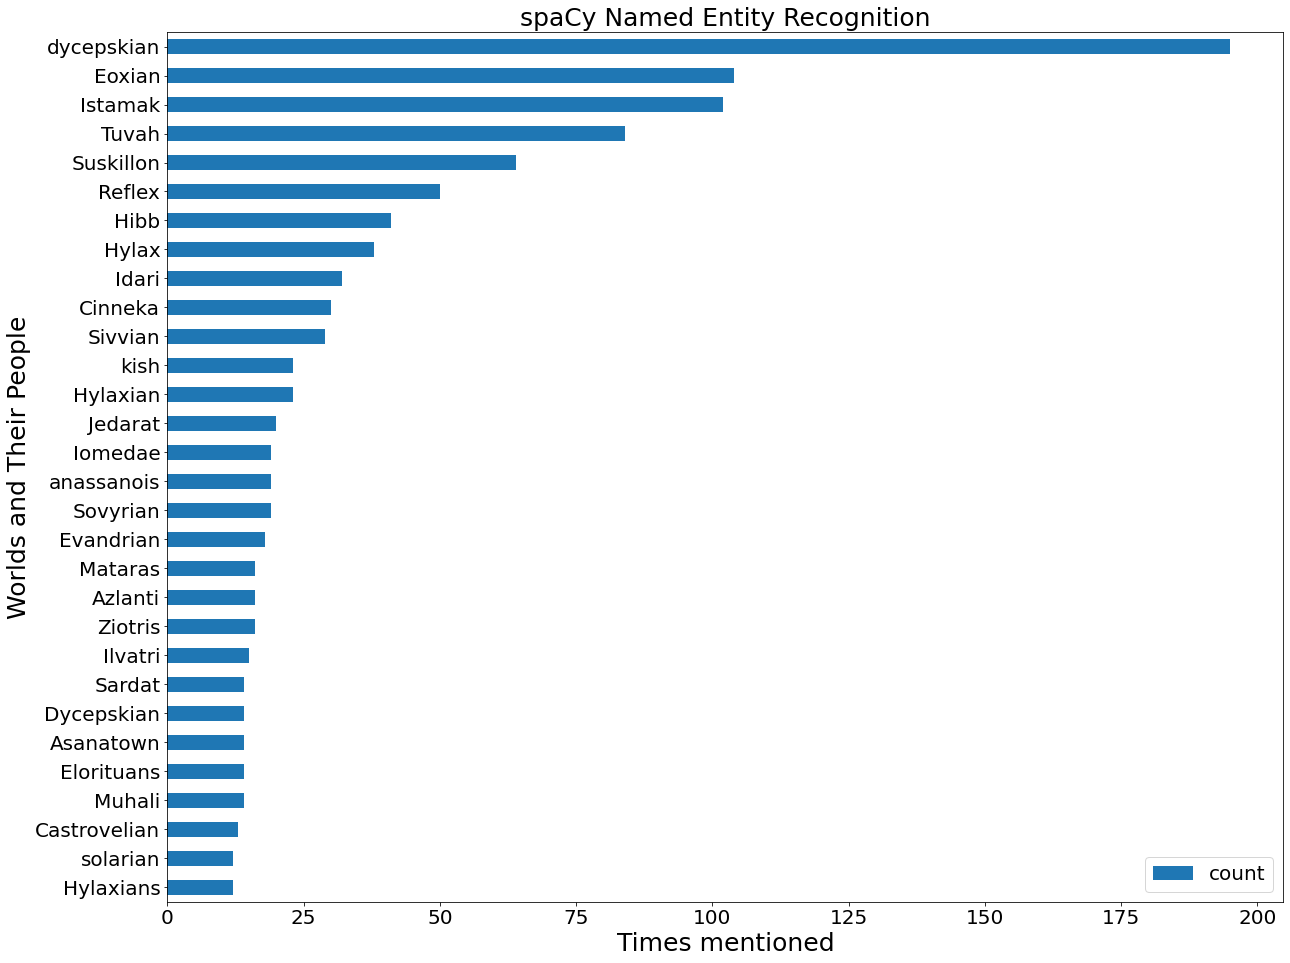

In [15]:
df_norp.plot.barh(x='text', y='count',figsize=(20,16)).invert_yaxis()
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Worlds and Their People', fontsize=25)
plt.xlabel('Times mentioned', fontsize=25)
plt.title("spaCy Named Entity Recognition",fontsize=25)
plt.legend(fontsize=20);